**task to be performed**

    1. perform data exploration
    2. build visualisation to understand different features
    3. perform data transformation using scalers and transformers
    4. perform data modeling using ml algorithms
    5. perform comparison on different ML algorithm and choose the best classifier
    

In [98]:
# importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [99]:
df = pd.read_csv('/content/students_adaptability_level_online_education.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


# 1 Data Exploration
### 1.1 Checking the shape of the dataset

In [100]:
df.shape

(1205, 14)

### 1.2 taking 5 sample values from the dataset

In [101]:
df.sample(5)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
671,Girl,21-25,University,Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
430,Boy,21-25,University,Government,No,No,High,Poor,Mobile Data,4G,3-6,No,Mobile,Moderate
546,Girl,6-10,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,High
1050,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
974,Boy,21-25,University,Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,Yes,Mobile,Low


### 1.3 checking the type of the columns present in the data

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


### 1.4 checking the null values

In [103]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

### 1.5 looking at the data at mathematical point of view

In [104]:
df.describe().T

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


### 1.6 checking duplicate values in the dataset

In [105]:
df.duplicated().sum()

949

# 2. Building Visualising for the dataset

### 2.1 Univariate Analysis

In [106]:
# univariate analysis
def univariate(data,col,kind):
  return df[col].value_counts().plot(kind = kind)


<Axes: >

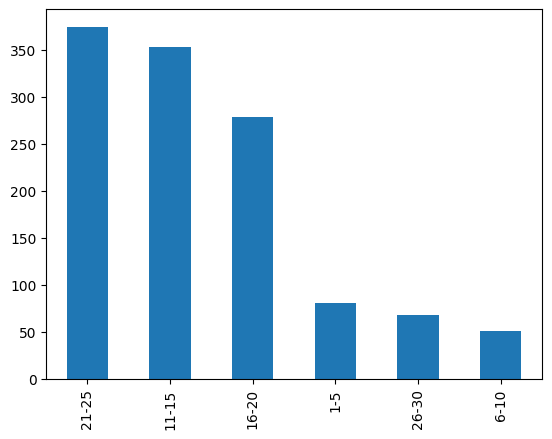

In [107]:
# univariate analysis on Age
univariate(df,'Age','bar')

### 2.2 Bivariate analysis

In [108]:
def visualise(dataframe,col1, col2):
  plot = sns.countplot(dataframe,x = col1,hue=col2)
  plt.title(col1 + ' vs ' + col2)
  return plot

<Axes: title={'center': 'Age vs Gender'}, xlabel='Age', ylabel='count'>

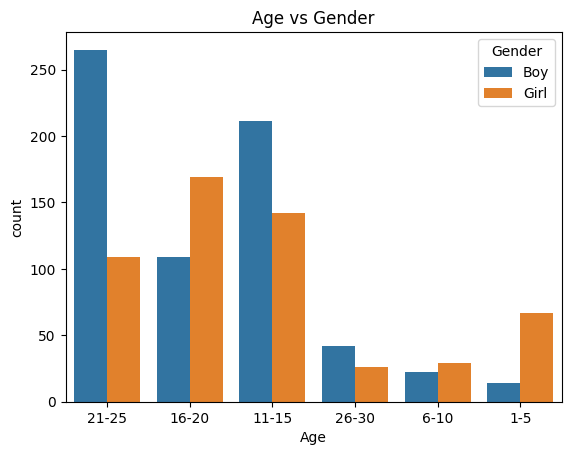

In [109]:
# visualise any 2 columns
visualise(df,'Age','Gender')

### 2.3 Multivariate analysis

In [110]:
def multivariate(data,col1,col2,col3):
  g = sns.FacetGrid(data,col= col1, hue= col2)
  g.map(sns.countplot, col3, palette = sns.color_palette("Set2"), alpha =0.5)
  g.add_legend()
  return g

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


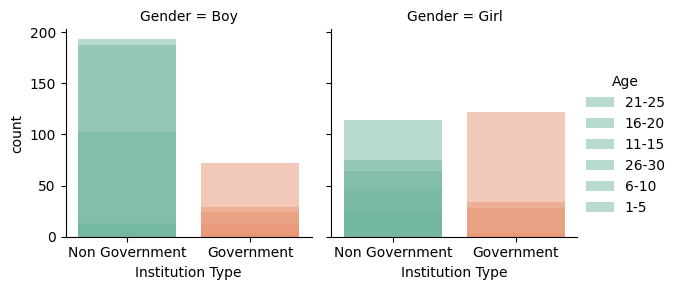

In [111]:
multivariate(df,'Gender','Age','Institution Type')

# 3. Transforming the data

### spliting the data into training dataset and testing dataset

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size = 0.25,random_state = 40 )

### label encoding

In [113]:
le = LabelEncoder()
Y_train_trans = le.fit_transform(Y_train)
Y_test_trans = le.fit_transform(Y_test)

### Using column transformers

In [114]:
# columns such as Age, Education Level, Financial Condition, Network type, Class Duration are ordinal data
# columns such as Gender, Institution Type, IT Student, Location, load-shedding, Internet Type, Self lms, Device are nominal data

transformer = ColumnTransformer(transformers=[
    ('onehotencoding',OneHotEncoder(sparse_output=False,drop='first'),
     ['Gender', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Internet Type', 'Self Lms', 'Device']),
 ('ordinalencoding',OrdinalEncoder(categories=[['1-5','6-10','11-15','16-20','21-25','26-30'],['School','College','University'],['Poor','Mid','Rich'],['2G','3G','4G'], ['0','1-3','3-6']]),
  ['Age', 'Education Level', 'Financial Condition', 'Network Type', 'Class Duration'])],
                                remainder='passthrough')

In [115]:
X_train_trans = transformer.fit_transform(X_train)
X_test_trans =transformer.fit_transform(X_test)


In [116]:
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler()
# X_train_trans = mms.fit(X_train_trans)
# X_test_trans = mms.fit(X_test_trans)

In [118]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_trans = ss.fit_transform(X_train_trans)
X_test_trans = ss.fit_transform(X_test_trans)

In [119]:
X_train_trans.shape

(903, 14)

In [120]:
X_test_trans.shape

(302, 14)

# Machine learning --> Model Selection and performance metrics calculation

### Metrics calculations for **Linear Regression**

In [254]:
# model selection
# linear model,logistic model
from sklearn.linear_model import LinearRegression
lreg   = LinearRegression()
lreg = lreg.fit(X_train_trans,Y_train_trans)
y_pred = lreg.predict(X_test_trans)

In [255]:
# accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [256]:
y_pred = y_pred.astype('int64')

In [257]:
print('Linear Regression Accuracy output: '+str(round(accuracy_score(Y_test_trans,y_pred)*100,3)))

Linear Regression Accuracy output: 35.099


In [264]:
# cross- validating for 10 iterations and taking the mean
from sklearn.model_selection import cross_val_score
print('After Cross Validating :'+str(round(np.mean(cross_val_score(lreg,X_train_trans, Y_train_trans,cv = 10)*100),3)))

After Cross Validating :7.707


### Metrics calculations for **linear model algorithm with Ridge Classifier**


In [249]:
from sklearn import linear_model
reg_ridge = linear_model.Ridge(alpha = 0.8)
reg = reg_ridge.fit(X_train_trans,Y_train_trans)

In [267]:
y_pred_linear = reg.predict(X_test_trans)
y_pred_linear = y_pred_linear.astype('int64')
print("Linear Model Algorithm with Ridge Classifier : "+str(round(accuracy_score(Y_test_trans,y_pred_linear)*100,3)))

Linear Model Algorithm with Ridge Classifier : 35.43


In [268]:
# cross- validating for 10 iterations and taking the mean
from sklearn.model_selection import cross_val_score
print('After Cross Validating :'+str(round(np.mean(cross_val_score(reg,X_train_trans, Y_train_trans,cv = 10)*100),3)))

After Cross Validating :7.713


### Metrics calculations for **linear model algorithm with lasso classifier**


In [246]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha = 0.8)
reg_lasso.fit(X_train_trans,Y_train_trans)

Lasso(alpha=0.8)

In [273]:
y_pred_lasso = reg_lasso.predict(X_test_trans)
y_pred_lasso =y_pred_linear.astype('int64')
print("Linear Model Algorithm with Lasso Classifier : "+str(round(accuracy_score(Y_test_trans,y_pred_lasso)*100,3)))

Linear Model Algorithm with Lasso Classifier : 35.43


In [274]:
# cross- validating for 10 iterations and taking the mean
from sklearn.model_selection import cross_val_score
print('After Cross Validating :'+ str(round(np.mean(cross_val_score(reg,X_train_trans, Y_train_trans,cv = 10)*100),3)))

After Cross Validating :7.713


### Metrics calculations for **Logistic Regression**

In [171]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
lr = logreg.fit(X_train_trans,Y_train_trans)
y_pred_log = lr.predict(X_test_trans)

In [276]:
y_pred_log = y_pred_log.astype('int64')
print("Logistic Regression : "+str(round(accuracy_score(Y_test_trans,y_pred_log)*100,3)))

Logistic Regression : 68.212


In [278]:
# cross- validating for 10 iterations and taking the mean
from sklearn.model_selection import cross_val_score
print('After Cross Validating :'+ str(round(np.mean(cross_val_score(lr,X_train_trans, Y_train_trans,cv = 10)*100),3)))

After Cross Validating :70.315


### Metrics calculations for **Support Vector Machine**


In [241]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_trans,Y_train_trans)

SVC()

In [242]:
y_pred_svm = clf.predict(X_test_trans)

In [280]:
print("Support Vector Machine : " +str(round(accuracy_score(Y_test_trans,y_pred_svm)*100,3)))

Support Vector Machine : 79.139


In [285]:
# cross- validating for 10 iterations and taking the mean
from sklearn.model_selection import cross_val_score
print("After Cross Validating : "+ str(round(np.mean(cross_val_score(clf,X_train_trans, Y_train_trans,cv = 10))*100,3)))

After Cross Validating : 78.951


### **SVM for Non-linearity**

In [231]:
from sklearn import svm
clf_ = svm.SVC(kernel = 'poly',gamma = 15,C=7,random_state = 0) # for non-linear
clf_.fit(X_train_trans,Y_train_trans)

SVC(C=7, gamma=15, kernel='poly', random_state=0)

In [259]:
y_pred_svm_ = clf_.predict(X_test_trans)

In [286]:
print("SVM for Non linear : "+str(round(accuracy_score(Y_test_trans,y_pred_svm_)*100,3)))

SVM for Non linear : 91.06


In [289]:
# cross- validating for 10 iterations and taking the mean
from sklearn.model_selection import cross_val_score
print("After Cross validating : " + str(round(np.mean(cross_val_score(clf_,X_train_trans, Y_train_trans,cv = 10)*100),3)))

After Cross validating : 87.819


### Metrics calculations for **Gradient Descent**


In [193]:
from sklearn.linear_model import SGDClassifier
gd = SGDClassifier()
gd = gd.fit(X_train_trans, Y_train_trans)

y_pred_gd = gd.predict(X_test_trans)


In [194]:
accuracy_score(Y_test_trans,y_pred_gd)

0.6688741721854304

In [299]:
# cross- validating for 10 iterations and taking the mean
from sklearn.model_selection import cross_val_score
print("After Cross validating : " + str(round(np.mean(cross_val_score(gd,X_train_trans, Y_train_trans,cv = 10))*100,3)))

After Cross validating : 66.446


### Metric calculation for **Decision Tree Classifier**


In [235]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_trans,Y_train_trans)
y_pred_dtc = dtc.predict(X_test_trans)

In [296]:
print("Decision Tree Classifier : "+str(round(accuracy_score(Y_test_trans,y_pred_dtc )*100,3)))

Decision Tree Classifier : 90.728


In [292]:
# cross- validating for 10 iterations and taking the mean
from sklearn.model_selection import cross_val_score
print("After Cross validating : " + str(round(np.mean(cross_val_score(dtc,X_train_trans, Y_train_trans,cv = 10))*100,3)))

After Cross validating : 88.482


<h1><b><p>So we can conclude that the best model for Students Adaptibility in online education is Decision Tree model Classifier whereas the worst possible algorithm that can be used is linear Model, Support Vector machine and logistic regression is also providing a better result as compared to the linear Models.</p></b></h1>